In [1]:
from clustertools import build_datacube
from clustertools.parameterset import build_parameter_set

from pprint import pprint
import numpy as np
from ipnb_helpers import ExperimentReader, plot_table

In [2]:
#selftra_exp = ExperimentReader("glas-self-train")
selftra_exp = ExperimentReader("glas-baseline-upper")
blupper_exp = ExperimentReader("glas-baseline-upper")
blnosel_exp = ExperimentReader("glas-baseline-noself")
blnospa_exp = ExperimentReader("glas-baseline-nosparse")


In [3]:
selftra_exp._exp_domain

{'rseed': [94829376,
  74695622,
  676837418,
  703192111,
  899444528,
  497403283,
  604080371,
  900102454,
  955154649,
  486139387]}

In [4]:
rows = [
    {"no_distillation": 'False', "weights_mode": "constant", "weights_constant": '0.01'},
    {"no_distillation": 'False', "weights_mode": "constant", "weights_constant": '0.05'},
    {"no_distillation": 'False', "weights_mode": "constant", "weights_constant": '0.1'},
    {"no_distillation": 'False', "weights_mode": "constant", "weights_constant": '0.25'},
    {"no_distillation": 'False', "weights_mode": "constant", "weights_constant": '0.5'},
    {"no_distillation": 'False', "weights_mode": "constant", "weights_constant": '1.0'},
    {"no_distillation": 'False', "weights_mode": "balance_gt" },
    {"no_distillation": 'False', "weights_mode": "balance_gt_overall" },
    {"no_distillation": 'False', "weights_mode": "pred_entropy", "weights_minimum": '0.01' },
    {"no_distillation": 'False', "weights_mode": "pred_entropy", "weights_minimum": '0.05' },
    {"no_distillation": 'False', "weights_mode": "pred_entropy", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "weights_mode": "pred_entropy", "weights_minimum": '0.25' },
    {"no_distillation": 'False', "weights_mode": "pred_entropy", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "weights_mode": "pred_entropy", "weights_minimum": '0.75' },
    {"no_distillation": 'False', "weights_mode": "pred_consistency", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute" },
    {"no_distillation": 'False', "weights_mode": "pred_consistency", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic" },
    {"no_distillation": 'False', "weights_mode": "pred_consistency", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute" },
    {"no_distillation": 'False', "weights_mode": "pred_consistency", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic" },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.01' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.01' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.01' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.01' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.05' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.05' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.05' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.05' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.1' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.25' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.25' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.25' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.25' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.5' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute", "weights_minimum": '0.75' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic", "weights_minimum": '0.75' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute", "weights_minimum": '0.75' },
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic", "weights_minimum": '0.75' },
    {"type": "bl-upper" },
    {"type": "bl-noself"},
    {"type": "bl-nosparse"},
]


In [5]:
def get_best_test_score(exp, **kwargs):
    val_metric = exp.get_metric("cal_hard_dice", **kwargs)
    if val_metric is None:
        return None
    best_epoch = np.argmax(val_metric, axis=1)
    test_metric = exp.get_metric("test_hard_dice", **kwargs)
    return test_metric[np.arange(best_epoch.shape[0]), best_epoch].reshape(-1, 1)

def get_last_test_score(exp, **kwargs):
    m = exp.get_metric("test_hard_dice", **kwargs)
    if m is None:
        return None
    return m[:, -1].reshape(-1, 1)

def base_exp_fn(exp_reader, **kwargs):
    if "type" in kwargs:
        if kwargs["type"] == "bl-nosparse":
            return get_last_test_score(blnospa_exp)
        elif kwargs["type"] == "bl-noself":
            return get_last_test_score(blnosel_exp)
        elif kwargs["type"] == "bl-upper":
            return get_best_test_score(blupper_exp)
    return get_last_test_score(exp_reader, **kwargs)

def get_thresh_error(exp, **kwargs):
    if kwargs.get("type") == "bl-nosparse":
        which = "last"
        exp = blnospa_exp
    elif kwargs.get("type") == "bl-noself":
        which = "last"
        exp = blnosel_exp
    elif kwargs.get("type") == "bl-upper":
        which = "best"
        exp = blupper_exp
        kwargs = {}
    else: which = "last"
    if "type" in kwargs:
        del kwargs["type"]
    cal_ths = exp.get_metric("cal_threshold", **kwargs)
    test_ths = exp.get_metric("test_pxl_threshold", **kwargs)
    if cal_ths is None:
        return None
    if which == "last":
        sel_cal_ths = cal_ths[:, -1].reshape(-1, 1)
        sel_test_ths = test_ths[:, -1].reshape(-1, 1)
    else:
        val_metric = exp.get_metric("cal_hard_dice", **kwargs)
        if val_metric is None:
            return None
        best_epoch = np.argmax(val_metric, axis=1)
        rows = np.arange(best_epoch.shape[0])
        sel_cal_ths = cal_ths[rows, best_epoch].reshape(-1, 1) 
        sel_test_ths = test_ths[rows, best_epoch].reshape(-1, 1)
    return (sel_cal_ths - sel_test_ths) / 100

def get_opt_test_error(exp, **kwargs):
    if kwargs.get("type") == "bl-nosparse":
        which = "last"
        exp = blnospa_exp
    elif kwargs.get("type") == "bl-noself":
        which = "last"
        exp = blnosel_exp
    elif kwargs.get("type") == "bl-upper":
        which = "best"
        exp = blupper_exp
        kwargs = {}
    else: which = "last"
    if "type" in kwargs:
        del kwargs["type"]
    test_error = exp.get_metric("test_pxl_self_hard_dice", **kwargs)
    if test_error is None:
        return None
    if which == "last":
        return test_error[:, -1].reshape(-1, 1)
    else:
        val_metric = exp.get_metric("cal_hard_dice", **kwargs)
        if val_metric is None:
            return None
        best_epoch = np.argmax(val_metric, axis=1)
        rows = np.arange(best_epoch.shape[0])
        return test_error[rows, best_epoch].reshape(-1, 1)

In [6]:
from functools import partial
exp_selftrai_fn = partial(base_exp_fn, selftra_exp)
exp_thresher_fn = partial(get_thresh_error, selftra_exp)
exp_opttests_fn = partial(get_opt_test_error, selftra_exp)
columns = [
    (exp_selftrai_fn, {"distil_target_mode": "hard_dice", "glas_nc": '2', "glas_rr": '0.9'}),
    (exp_opttests_fn, {"distil_target_mode": "hard_dice", "glas_nc": '2', "glas_rr": '0.9'}),
    (exp_thresher_fn, {"distil_target_mode": "hard_dice", "glas_nc": '2', "glas_rr": '0.9'}),
    (exp_selftrai_fn, {"distil_target_mode": "soft", "glas_nc": '2', "glas_rr": '0.9'}),
    (exp_opttests_fn, {"distil_target_mode": "soft", "glas_nc": '2', "glas_rr": '0.9'}),
    (exp_thresher_fn, {"distil_target_mode": "soft", "glas_nc": '2', "glas_rr": '0.9'}),
]

In [7]:
plot_table(rows, columns, 30)


\begin{table*}
\begin{tabular}{|ccc|cccccc|}
\multicolumn{3}{|c|}{$|\mathcal{D}_l|/|\mathcal{D}_s|$} & 2/28 & 2/28 & 2/28 & 2/28 & 2/28 & 2/28\\
\multicolumn{3}{|c|}{$\rho$} &  90\% &  90\% &  90\% &  90\% &  90\% &  90\%\\
\hline
\multicolumn{9}{|l|}{Constant ($C$)} \\
\hline
\hline
\multicolumn{9}{|l|}{Balance} \\
\hline
\hline
\multicolumn{9}{|l|}{Balance (overall)} \\
\hline
\hline
\multicolumn{9}{|l|}{Entropy - $w_{\text{min}}$} \\
\hline
\hline
\multicolumn{9}{|l|}{Consistency - $\eta, c(y_1, y_2)$} \\
\hline
\hline
\multicolumn{9}{|l|}{Merged - $w_{\text{min}}, \eta, c(y_1, y_2)$} \\
\hline
\hline
\multicolumn{9}{|l|}{Baselines} \\
\hline
\multicolumn{3}{|c|}{$|\mathcal{D}_s| = 0$}  &  90.71 ± 0.63 & 91.00 ± 0.54 & 0.01 ± 0.09 & 90.71 ± 0.63 & 91.00 ± 0.54 & 0.01 ± 0.09 \\
\multicolumn{3}{|c|}{$\mathcal{D}_l \cup \mathcal{D}_s$}  &  44.64 ± 10.54 &                    &                    & 44.64 ± 10.54 &                    &                    \\
\multicolumn{3}{|c|}{$\mathcal{

In [8]:
merged_no_target_rows = [
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "absolute"},
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '1', "weights_consistency_fn": "quadratic"},
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "absolute"},
    {"no_distillation": 'False', "weights_mode": "pred_merged", "weights_neighbourhood": '2', "weights_consistency_fn": "quadratic"},
]
merged_no_target_cols = [
    (exp_selftrai_fn, {"glas_nc": '8', "glas_rr": '0.9', "weights_minimum": '0.01'}),
    (exp_selftrai_fn, {"glas_nc": '8', "glas_rr": '0.9', "weights_minimum": '0.05'}),
    (exp_selftrai_fn, {"glas_nc": '8', "glas_rr": '0.9', "weights_minimum": '0.1'}),
    (exp_selftrai_fn, {"glas_nc": '8', "glas_rr": '0.9', "weights_minimum": '0.25'}),
    (exp_selftrai_fn, {"glas_nc": '8', "glas_rr": '0.9', "weights_minimum": '0.5'}),
    (exp_selftrai_fn, {"glas_nc": '8', "glas_rr": '0.9', "weights_minimum": '0.75'}),
]

for target in ["soft", "hard_dice"]:
    plot_table([{**row, "distil_target_mode": target} for row in merged_no_target_rows], merged_no_target_cols, 30)

\begin{table*}
\begin{tabular}{|ccc|cccccc|}
\multicolumn{3}{|c|}{$|\mathcal{D}_l|/|\mathcal{D}_s|$} & 8/22 & 8/22 & 8/22 & 8/22 & 8/22 & 8/22\\
\multicolumn{3}{|c|}{$\rho$} &  90\% &  90\% &  90\% &  90\% &  90\% &  90\%\\
\hline
\multicolumn{9}{|l|}{Merged - $w_{\text{min}}, \eta, c(y_1, y_2)$} \\
\hline
\end{tabular}
\end{table*}
\begin{table*}
\begin{tabular}{|ccc|cccccc|}
\multicolumn{3}{|c|}{$|\mathcal{D}_l|/|\mathcal{D}_s|$} & 8/22 & 8/22 & 8/22 & 8/22 & 8/22 & 8/22\\
\multicolumn{3}{|c|}{$\rho$} &  90\% &  90\% &  90\% &  90\% &  90\% &  90\%\\
\hline
\multicolumn{9}{|l|}{Merged - $w_{\text{min}}, \eta, c(y_1, y_2)$} \\
\hline
\end{tabular}
\end{table*}


[2022-04-19 10:22:16,564][INFO] [GET] [currentuser] CURRENT USER - 6827109 : rmormont | 200 OK
[2022-04-19 10:22:32,639][INFO] [GET] [imageinstance collection] 44 objects | 200 OK
[2022-04-19 10:22:40,258][INFO] [GET] [annotation collection] 24059 objects | 200 OK
> predicting for current set needs approx 8.0MiB of memory
> predicting for current set needs approx 56.0MiB of memory


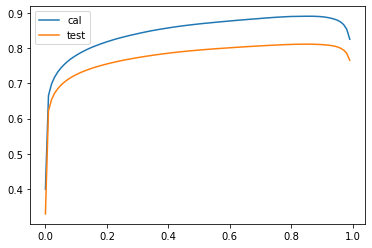

[2022-04-19 10:23:02,619][INFO] [GET] [imageinstance collection] 44 objects | 200 OK
[2022-04-19 10:23:09,261][INFO] [GET] [annotation collection] 24059 objects | 200 OK
> predicting for current set needs approx 8.0MiB of memory
> predicting for current set needs approx 56.0MiB of memory


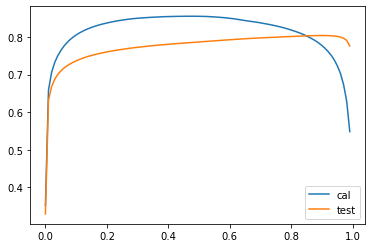

[2022-04-19 10:23:28,613][INFO] [GET] [imageinstance collection] 44 objects | 200 OK
[2022-04-19 10:23:34,868][INFO] [GET] [annotation collection] 24059 objects | 200 OK
> predicting for current set needs approx 8.0MiB of memory
> predicting for current set needs approx 56.0MiB of memory


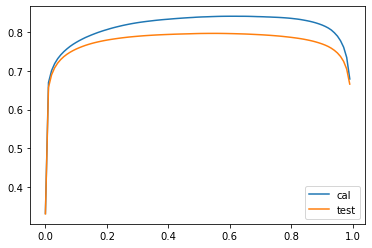

[2022-04-19 10:23:55,094][INFO] [GET] [imageinstance collection] 44 objects | 200 OK
[2022-04-19 10:24:01,647][INFO] [GET] [annotation collection] 24059 objects | 200 OK
> predicting for current set needs approx 8.0MiB of memory
> predicting for current set needs approx 56.0MiB of memory


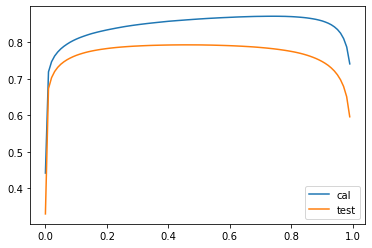

[2022-04-19 10:24:21,095][INFO] [GET] [imageinstance collection] 44 objects | 200 OK
[2022-04-19 10:24:27,243][INFO] [GET] [annotation collection] 24059 objects | 200 OK
> predicting for current set needs approx 8.0MiB of memory
> predicting for current set needs approx 56.0MiB of memory


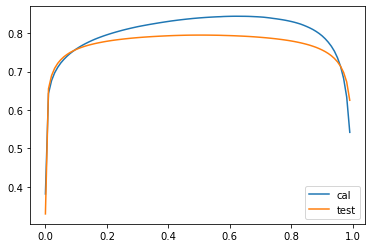

[2022-04-19 10:24:48,080][INFO] [GET] [imageinstance collection] 44 objects | 200 OK
[2022-04-19 10:24:54,536][INFO] [GET] [annotation collection] 24059 objects | 200 OK
> predicting for current set needs approx 8.0MiB of memory
> predicting for current set needs approx 56.0MiB of memory


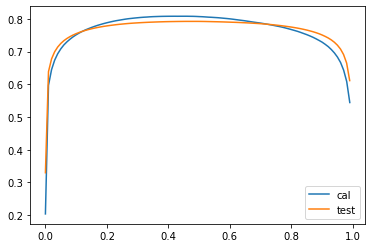

[2022-04-19 10:25:14,528][INFO] [GET] [imageinstance collection] 44 objects | 200 OK
[2022-04-19 10:25:20,743][INFO] [GET] [annotation collection] 24059 objects | 200 OK
> predicting for current set needs approx 8.0MiB of memory
> predicting for current set needs approx 56.0MiB of memory


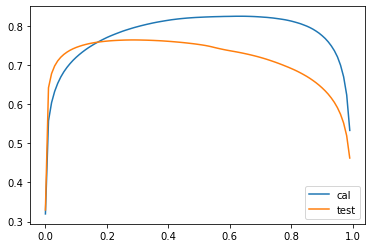

[2022-04-19 10:25:41,313][INFO] [GET] [imageinstance collection] 44 objects | 200 OK
[2022-04-19 10:25:47,639][INFO] [GET] [annotation collection] 24059 objects | 200 OK
> predicting for current set needs approx 8.0MiB of memory
> predicting for current set needs approx 56.0MiB of memory


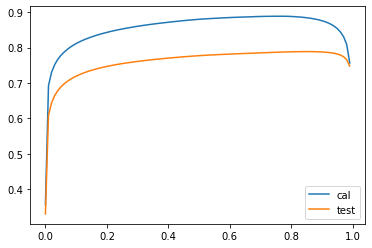

[2022-04-19 10:26:07,184][INFO] [GET] [imageinstance collection] 44 objects | 200 OK
[2022-04-19 10:26:13,602][INFO] [GET] [annotation collection] 24059 objects | 200 OK
> predicting for current set needs approx 8.0MiB of memory
> predicting for current set needs approx 56.0MiB of memory


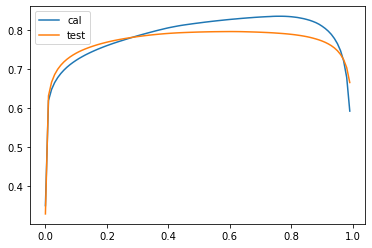

[2022-04-19 10:26:33,063][INFO] [GET] [imageinstance collection] 44 objects | 200 OK
[2022-04-19 10:26:39,095][INFO] [GET] [annotation collection] 24059 objects | 200 OK
> predicting for current set needs approx 8.0MiB of memory
> predicting for current set needs approx 56.0MiB of memory


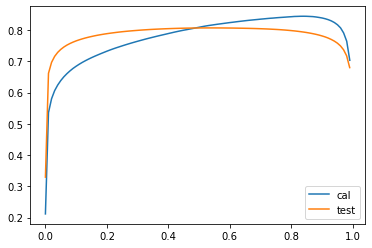

In [9]:
from unet import Unet
from dataset import predict_set
from monuseg import MonusegDatasetGenerator
import numpy as np
import torch
from threshold_optimizer import Thresholdable, thresh_exhaustive_eval
from augment import get_norm_transform
import os
from cytomine import Cytomine
from matplotlib import pyplot as plt

curve_data = {**{"no_distillation": 'False', "distil_target_mode": "hard_dice", "weights_mode": "constant", "weights_constant": '0.1'}, **{"monu_nc": '2', "monu_rr": '0.9'}}

cytomine = Cytomine.connect(host="https://research.cytomine.be", public_key="a7da7601-41ee-455c-9ad2-79262276d948", private_key="50a5afb0-b4b2-494c-8c15-76c06abc7d8a")

def determine_optimal_threshold(calibration_list, model, step, device, worker_init_fn=None, progress_fn=None):
    masks = predict_set(model, calibration_list, device, get_norm_transform(), overlap=0, batch_size=8,
                        n_jobs=2, worker_init_fn=worker_init_fn, progress_fn=progress_fn)
    all_y_pred, all_y_true = np.array([]), np.array([])
    for crop, y_pred in zip(calibration_list, masks):
        _, y_true, _, _, _ = crop.crop_and_mask()
        y_true = np.asarray(y_true).astype(np.uint8) / 255
        all_y_pred = np.hstack([all_y_pred, y_pred.flatten()])
        all_y_true = np.hstack([all_y_true, y_true.flatten()])
    th_opt = Thresholdable(all_y_true, all_y_pred)
    thresholds, dices = thresh_exhaustive_eval(th_opt, eps=step)
    return thresholds, dices

device = torch.device("cuda:0")
unet = Unet(8, n_classes=1)
unet.to(device)

at_epoch = -1

all_data = list()
for params, results in selftra_exp.get_computations(**curve_data): 
    dataset = MonusegDatasetGenerator("/scratch/users/rmormont/monuseg", 512, missing_seed=params['monu_ms'], remove_ratio=params['monu_rr'],
                                    n_complete=params['monu_nc'], n_validation=0)

    incomplete_list, complete_list, test_list, validation_list = dataset.sets()
    
    model_path = "/home/rmormont/models/monuseg-unet/selftrain/"
    model_filepath = os.path.join(model_path, results['save_path'][at_epoch])
    unet.load_state_dict(torch.load(model_filepath))
    unet.eval()
    
    all_th_cal, all_dice_cal = determine_optimal_threshold(complete_list, unet, 0.01, device, worker_init_fn=None)
    all_th_test, all_dice_test = determine_optimal_threshold(test_list, unet, 0.01, device, worker_init_fn=None)

    all_data.append(((all_th_cal, all_dice_cal), (all_th_test, all_dice_test)))
    
    plt.figure()
    plt.plot(all_th_cal, all_dice_cal, label="cal")
    plt.plot(all_th_test, all_dice_test, label="test")
    plt.legend()
    plt.show()
    plt.close()
